# **Polynomial Regression to Predict Salaries (From Scratch)**

# What This Notebook Covers

  

*   Difference between Linear & Polynomial Regression
*   Manual polynomial feature expansion

*   Gradient Descent on high-degree features
*   Cost convergence visualization

*   Comparison with scikit-learn implementation
















In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


# Create Example Dataset (Experience vs Salary)

In [2]:
data = {
    "YearsExperience": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Salary": [45000, 50000, 60000, 80000, 110000, 150000, 200000, 300000, 500000, 1000000]
}


df = pd.DataFrame(data)
print("Dataset:\n", df)

Dataset:
    YearsExperience   Salary
0                1    45000
1                2    50000
2                3    60000
3                4    80000
4                5   110000
5                6   150000
6                7   200000
7                8   300000
8                9   500000
9               10  1000000


# Visualize the Data

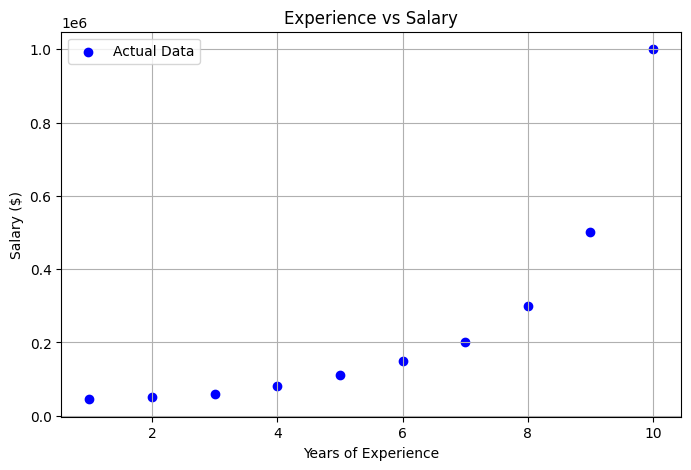

In [3]:
plt.figure(figsize=(8,5))
plt.scatter(df["YearsExperience"], df["Salary"], color='blue', label="Actual Data")
plt.title("Experience vs Salary")
plt.xlabel("Years of Experience")
plt.ylabel("Salary ($)")
plt.legend()
plt.grid(True)
plt.show()

# Prepare Data

In [4]:
x = df["YearsExperience"].values.reshape(-1, 1)
y = df["Salary"].values.reshape(-1, 1)

# Implement Polynomial Feature Expansion (Manually)

In [8]:
def polynomial_features(x , degree):


   m = x.shape[0]
   X_poly = np.ones((m, degree + 1))
   for i in range(1, degree + 1):
      X_poly[:, i] = x[:, 0] ** i
      return X_poly

# Choose polynomial degree
degree = 3
x_poly = polynomial_features(x, degree)

# Define Hypothesis Function

In [9]:
def predict(x ,w):
  return np.dot(x , w)


# Define Cost Function (MSE)

In [10]:
def compute_cost(x , y , w):
  m = len(y)
  predictions = predict(x , w)
  cost = np.sum((predictions - y)**2 ) / ( 2 * m)
  return cost

# Compute Gradient

In [11]:
def compute_gradient(x , y , w):
  m = len(y)
  predictions = predict(x , w)
  dj_dw = (1 / m) * np.dot(x.T , (predictions - y))
  return dj_dw

# Gradient Descent

In [13]:
def gradient_descent(x, y, w_in, alpha, num_iters):
    w = w_in
    cost_history = []

    for i in range(num_iters):
        dj_dw = compute_gradient(x, y, w)
        w -= alpha * dj_dw

        if i % 1000 == 0:
            cost = compute_cost(x, y, w)
            cost_history.append(cost)
            print(f"Iteration {i:5d}: Cost = {cost:.4f}")
    return w, cost_history

# Initialize and Train Model

In [14]:
w_init = np.zeros((degree + 1, 1))
alpha = 0.0000000001   # smaller alpha since polynomial features grow fast
iterations = 20000

print("\nTraining Polynomial Regression Model...")
w_final, cost_history = gradient_descent(x_poly, y, w_init, alpha, iterations)


print("\nTraining Complete!")
print("Final weights:\n", w_final)


Training Polynomial Regression Model...
Iteration     0: Cost = 71456249565.3689
Iteration  1000: Cost = 71455814936.0465
Iteration  2000: Cost = 71455380310.2740
Iteration  3000: Cost = 71454945688.0514
Iteration  4000: Cost = 71454511069.3785
Iteration  5000: Cost = 71454076454.2555
Iteration  6000: Cost = 71453641842.6822
Iteration  7000: Cost = 71453207234.6587
Iteration  8000: Cost = 71452772630.1849
Iteration  9000: Cost = 71452338029.2607
Iteration 10000: Cost = 71451903431.8862
Iteration 11000: Cost = 71451468838.0614
Iteration 12000: Cost = 71451034247.7861
Iteration 13000: Cost = 71450599661.0603
Iteration 14000: Cost = 71450165077.8842
Iteration 15000: Cost = 71449730498.2575
Iteration 16000: Cost = 71449295922.1803
Iteration 17000: Cost = 71448861349.6525
Iteration 18000: Cost = 71448426780.6742
Iteration 19000: Cost = 71447992215.2452

Training Complete!
Final weights:
 [[0.49897607]
 [4.07883474]
 [0.49897607]
 [0.49897607]]


# Visualize Cost vs Iterations

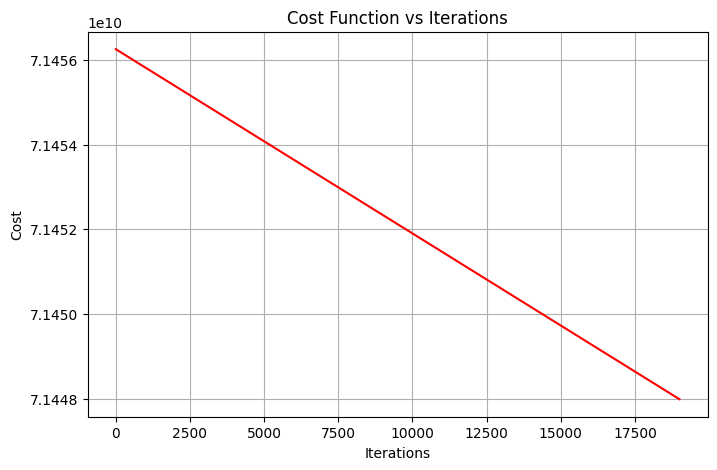

In [15]:
plt.figure(figsize=(8,5))
plt.plot(np.arange(0, len(cost_history))*1000, cost_history, color='red')
plt.title("Cost Function vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.grid(True)
plt.show()

# Visualize Polynomial Regression Curve

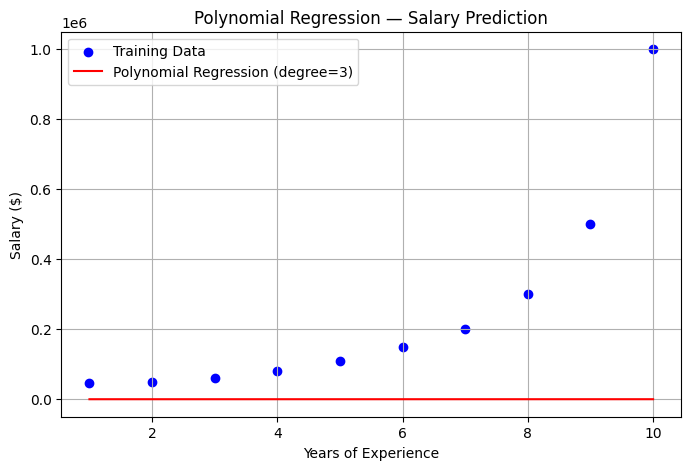

In [16]:
x_fit = np.linspace(min(x), max(x), 100).reshape(-1, 1)
x_fit_poly = polynomial_features(x_fit, degree)
y_pred = predict(x_fit_poly, w_final)

plt.figure(figsize=(8,5))
plt.scatter(x, y, color='blue', label="Training Data")
plt.plot(x_fit, y_pred, color='red', label=f"Polynomial Regression (degree={degree})")
plt.title("Polynomial Regression — Salary Prediction")
plt.xlabel("Years of Experience")
plt.ylabel("Salary ($)")
plt.legend()
plt.grid(True)
plt.show()

# comparison with scikit-learn Polynomial Regression

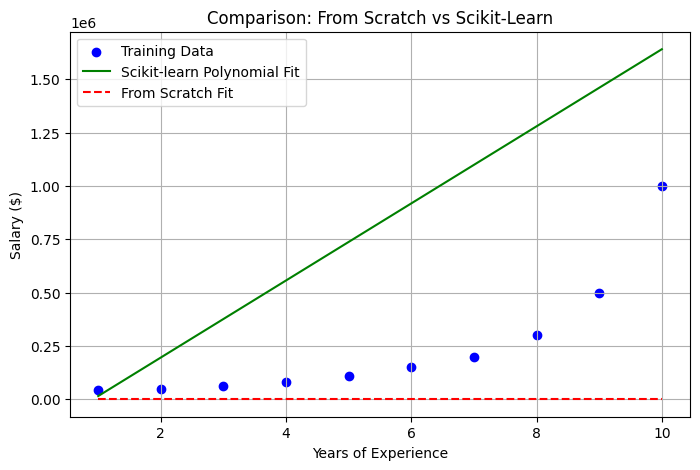

In [17]:
poly = PolynomialFeatures(degree=degree)
x_poly_sklearn = poly.fit_transform(x)

model = LinearRegression()
model.fit(x_poly_sklearn, y)

y_pred_sklearn = model.predict(x_fit_poly)

plt.figure(figsize=(8,5))
plt.scatter(x, y, color='blue', label="Training Data")
plt.plot(x_fit, y_pred_sklearn, color='green', label="Scikit-learn Polynomial Fit")
plt.plot(x_fit, y_pred, color='red', linestyle='--', label="From Scratch Fit")
plt.title("Comparison: From Scratch vs Scikit-Learn")
plt.xlabel("Years of Experience")
plt.ylabel("Salary ($)")
plt.legend()
plt.grid(True)
plt.show()

# Predict Salary for New Experience Value

In [18]:
new_exp = np.array([[12]])
new_exp_poly = polynomial_features(new_exp, degree)
pred_salary = predict(new_exp_poly, w_final)
print(f"\nPredicted salary for 12 years of experience: ${pred_salary[0][0]:,.2f}")


Predicted salary for 12 years of experience: $50.44
